In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_sarc = pd.read_csv('sarc_learning.csv')
df = pd.read_csv('initial_learning.csv')

df_back_group = pd.read_csv('back_group.csv')
df_back = pd.read_csv('back.csv')

df_PCA = pd.read_csv('PCA.csv')

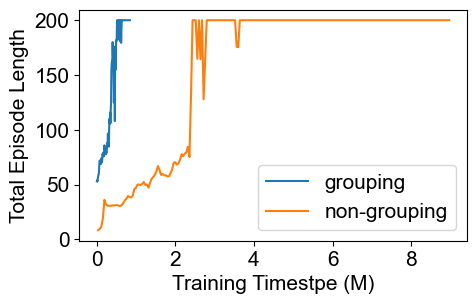

In [101]:
step_back = df_back['global_step'].to_numpy()/1e6
step_back_group = df_back_group['global_step'].to_numpy()/1e6

back_group = df_back_group['earnest-puddle-773 - eval/mean_ep_length']
back = df_back['vibrant-sky-75 - eval/mean_ep_length']*2/3

plt.rcParams['font.size'] = 15  # sets the default font size
plt.rcParams['font.family'] = 'Arial'  # sets the default font family
plt.figure(figsize=(5, 3))

plt.plot(step_back_group, back_group, label = 'grouping')
plt.plot(step_back, back, label = 'non-grouping')
plt.xlabel('Training Timestpe (M)')
plt.ylabel('Total Episode Length')
plt.legend()


In [136]:
steps = df['global_step'].to_numpy()/1e6
window_size = 1  # Adjust this to change the smoothing effect

# Calculate the rolling meanimum

SAR_healthy = df['worthy-wood-836 - eval/mean_reward']
smoothed_SAR_healthy = SAR_healthy.fillna(method='ffill')
smoothed_SAR_healthy = smoothed_SAR_healthy.rolling(window=window_size).mean() 

CL_healthy = df['soft-moon-795 - eval/mean_reward']
smoothed_CL_healthy = CL_healthy.fillna(method='ffill')
smoothed_CL_healthy = smoothed_CL_healthy.rolling(window=window_size).mean() - 50

CL_cont = df['distinctive-pond-797 - eval/mean_reward']
smoothed_CL_cont = CL_cont.fillna(method='ffill')
smoothed_CL_cont = smoothed_CL_cont.rolling(window=window_size).mean() - 50

combined_CL = pd.concat([smoothed_CL_healthy[:200], smoothed_CL_cont[150:]], ignore_index=True)

CL_sarc_healthy = df['stellar-dawn-769 - eval/mean_reward']
smoothed_CL_sarc_healthy = CL_sarc_healthy.fillna(method='ffill')
smoothed_CL_sarc_healthy = smoothed_CL_sarc_healthy.rolling(window=window_size).mean()

CL_sarc = df['radiant-bee-760 - eval/mean_reward'] - 300
smoothed_CL_sarc= CL_sarc.fillna(method='ffill')
smoothed_CL_sarc = smoothed_CL_sarc.rolling(window=window_size).mean() 

CL_sarc = df['radiant-bee-760 - eval/mean_reward'] - 300
smoothed_CL_sarc= CL_sarc.fillna(method='ffill')
smoothed_CL_sarc = smoothed_CL_sarc.rolling(window=window_size).mean() 

SAR_35 = df_PCA['Group: 35_PCA - eval/mean_reward']
SAR_50 = df_PCA['Group: 50_PCA - eval/mean_reward']


sarc_80_filled = df_sarc['peachy-voice-839 - eval/mean_reward'].fillna(method='ffill')
smoothed_sarc_80 = sarc_80_filled.rolling(window=window_size).mean()

sarc_60_filled = df_sarc['fearless-dragon-841 - eval/mean_reward'].fillna(method='ffill')
smoothed_sarc_60 = sarc_60_filled.rolling(window=window_size).mean()

sarc_40_filled = df_sarc['polar-wood-842 - eval/mean_reward'].fillna(method='ffill')
smoothed_sarc_40 = sarc_40_filled.rolling(window=window_size).mean()


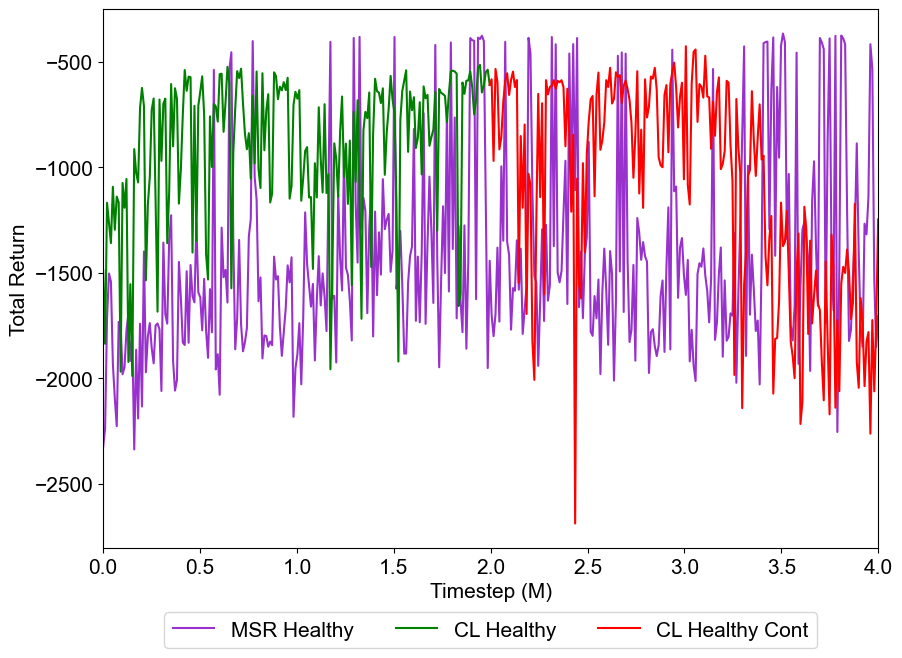

In [133]:
plt.rcParams['font.size'] = 15  # sets the default font size
plt.rcParams['font.family'] = 'Arial'  # sets the default font family
plt.figure(figsize=(10, 7))

x = np.linspace(0, 4, 400)
plt.plot(x, smoothed_SAR_healthy[:400],  color='darkorchid', label = "MSR Healthy")
plt.plot(x[:200], combined_CL[:200], label='CL Healthy', color='green', linestyle='-')
# Plot the second part in another color, e.g., red
plt.plot(x[199:400], combined_CL[199:400], label='CL Healthy Cont', color='red', linestyle='-')



#plt.plot(smoothed_sarc_80, label='Smoothed Sarc 80', linewidth=2)
#plt.plot(smoothed_sarc_60, label='Smoothed Sarc 60', linewidth=2)
#plt.plot(smoothed_sarc_40, label='Smoothed Sarc 40', linewidth=2)
plt.xlim([0, 4])
plt.xlabel('Timestep (M)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)
plt.ylabel('Total Return')
plt.show()

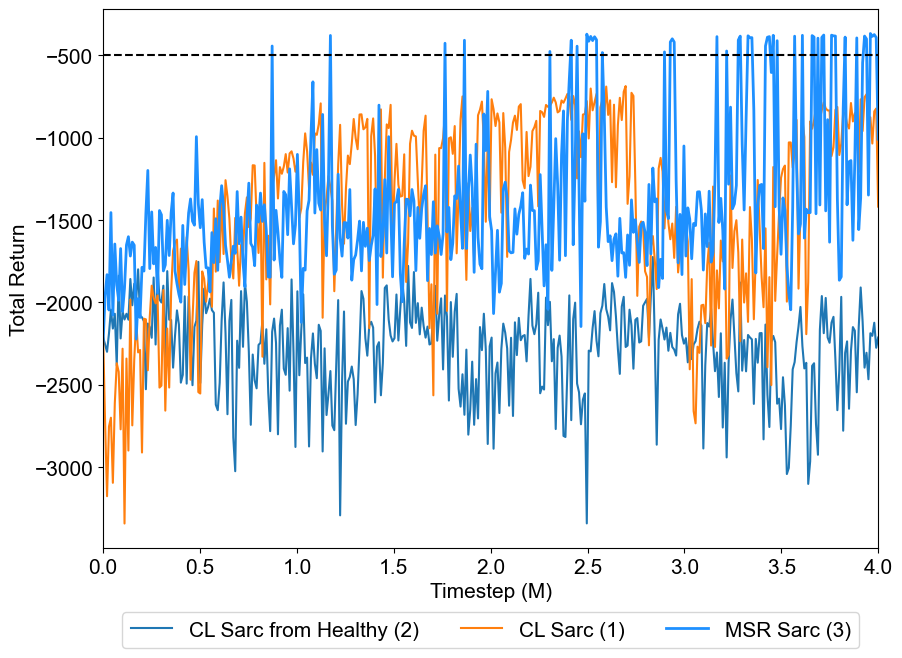

In [132]:
plt.rcParams['font.size'] = 15  # sets the default font size
plt.rcParams['font.family'] = 'Arial'  # sets the default font family
plt.figure(figsize=(10, 7))

plt.plot(x, smoothed_CL_sarc[:400], label = 'CL Sarc (1)')
plt.plot(x, smoothed_CL_sarc_healthy[:400], label = 'CL Sarc from Healthy (2)')
plt.plot(x, smoothed_sarc_80[:400], label='MSR Sarc (3)', c = 'dodgerblue', linewidth=2)
plt.axhline(y = -500, color = 'black', linestyle = 'dashed')

plt.xlim([0, 4])
plt.xlabel('Timestep (M)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)
plt.ylabel('Total Return')
plt.show()

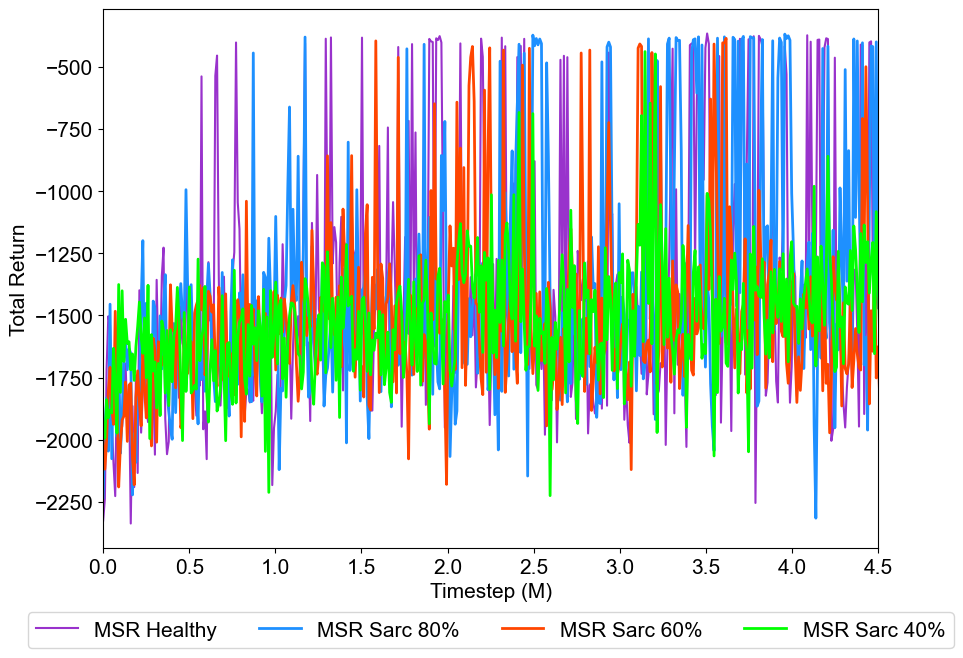

In [134]:
plt.rcParams['font.size'] = 15  # sets the default font size
plt.rcParams['font.family'] = 'Arial'  # sets the default font family
plt.figure(figsize=(10, 7))

x = np.linspace(0, 5, 500)
plt.plot(x, smoothed_SAR_healthy[:500],  color='darkorchid', label = "MSR Healthy")
plt.plot(x, smoothed_sarc_80[:500], label='MSR Sarc 80%', c = 'dodgerblue', linewidth=2)
plt.plot(x, smoothed_sarc_60[:500], label='MSR Sarc 60%', c = 'orangered', linewidth=2)
plt.plot(x, smoothed_sarc_40[:500], label='MSR Sarc 40%', c = 'lime', linewidth=2)
plt.xlim([0, 4.5])
plt.xlabel('Timestep (M)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=4)
plt.ylabel('Total Return')
plt.show()

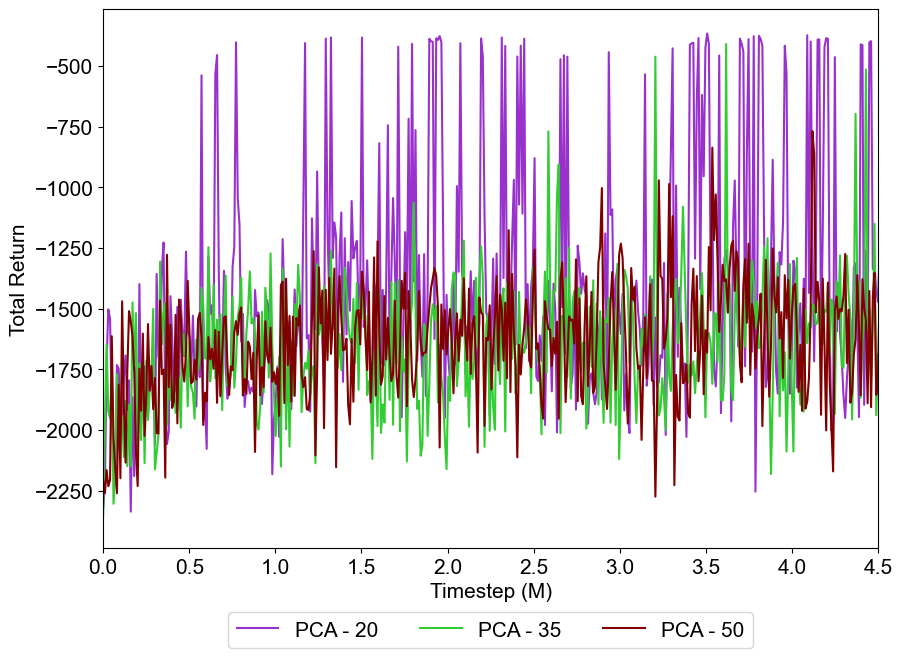

In [139]:
plt.rcParams['font.size'] = 15  # sets the default font size
plt.rcParams['font.family'] = 'Arial'  # sets the default font family
plt.figure(figsize=(10, 7))

x = np.linspace(0, 5, 500)
plt.plot(x, smoothed_SAR_healthy[:500],  color='darkorchid', label = "PCA - 20")
plt.plot(x, SAR_35[:500],  color='limegreen', label = "PCA - 35")
plt.plot(x, SAR_50[:500],  color='maroon', label = "PCA - 50")
plt.xlim([0, 4.5])
plt.xlabel('Timestep (M)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=4)
plt.ylabel('Total Return')
plt.show()